<a href="https://colab.research.google.com/github/RachitBansal/Power-Forecasting/blob/master/ALL_MODEL_COMPARISON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import os
from keras.models import load_model,Sequential 
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:

print("Enter no of equipments : ")
num_points  = int(input())

Enter no of equipments : 
9


In [0]:
cnn_lstm_path = "My Drive/Greend"
lstm_path = "My Drive/Greend/Saved_weights/LSTM_weights"
ann_path = "My Drive/Greend/Saved_weights/ANN_weights"

In [28]:
os.listdir("My Drive/Greend/Saved_weights")

['LSTM_weights', 'ANN_weights', 'CNN_LSTM_weights']

In [0]:
cnnlstm = os.listdir(cnn_lstm_path)
lstm = os.listdir(lstm_path)
ann = os.listdir(ann_path)

In [0]:
Cnn = []
Lstm  =[]
Ann = []
for i in range(9):
    model1=load_model(cnn_lstm_path+'/weights{}_model_1.h5'.format(i))
    model2=load_model(lstm_path+'/{}_model_1.h5'.format(i))
    model3=load_model(ann_path+'/{}_model_1.h5'.format(i))
    Cnn.append(model1)
    Lstm.append(model2)
    Ann.append(model3)

In [0]:
def load_data(path):
    x_test = []
    y_test = []
    for i in range(num_points):
        filenamex = path+"/xt_greend_eq{}.npy".format(i)
        filenamey = path+"/yt_greend_eq{}.npy".format(i)
        x_temp = np.load(filenamex)/300
        y_temp = np.load(filenamey)/300
        lent = x_temp.shape[0]
        lent = int(0.8*lent)
        x_temp = x_temp[:lent]
        y_temp = y_temp[:lent]
        x_test.append(x_temp)
        y_test.append(y_temp)
    return x_test,y_test    

In [57]:
print("Enter the number of points for Predictions and graphs : ")
points = int(input())

Enter the number of points for Predictions and graphs : 
50


In [0]:
x_test,y_test = load_data(cnn_lstm_path)

In [0]:
def all_model_graphs():
    for i in range(9):
        cnnpred = Cnn[i].predict(x_test[i][:points].reshape(points,128,1)).reshape(-1,)
        lstmpred = Lstm[i].predict(x_test[i][:points].reshape(points,128,1)).reshape(-1,)
        annpred = Ann[i].predict(x_test[i][:points].reshape(-1,128)).reshape(-1,)
        ensemblepred = np.load(cnn_lstm_path+"/results_ensemble{}_model_500.npy".format(i))
        ensemblepred = ensemblepred[:points].reshape(-1)
        realpoints = y_test[i][:points].reshape(-1,)
        print("Graph of equipment {} : \n".format(i+1))
        plt.plot(cnnpred,label = "cnn-lstm")
        plt.plot(lstmpred,label = "lstm")
        plt.plot(annpred,label = "ann")
        plt.plot(ensemblepred,label = "ensemble")
        plt.plot(realpoints,label = "Actual Values")
        plt.legend()
        plt.show()

        print("Metrics of equipment {} : \n\n".format(i+1))
        print("CNN_LSTM: \n")
        error = mean_squared_error(realpoints, cnnpred)
        print('Test MSE: %.3f' % error)
        print("RMSE : %.3f"%(np.sqrt(error)))
        print("MAE : %.3f"%(mean_absolute_error(realpoints,cnnpred)))
        
        print("\n\nLSTM: \n")
        error = mean_squared_error(realpoints, lstmpred)
        print('Test MSE: %.3f' % error)
        print("RMSE : %.3f"%(np.sqrt(error)))
        print("MAE : %.3f"%(mean_absolute_error(realpoints,lstmpred)))

        print("\n\nANN: \n")
        error = mean_squared_error(realpoints, annpred)
        print('Test MSE: %.3f' % error)
        print("RMSE : %.3f"%(np.sqrt(error)))
        print("MAE : %.3f"%(mean_absolute_error(realpoints,annpred)))

        print("\n\nENSEMBLE : \n")
        error = mean_squared_error(realpoints, ensemblepred)
        print('Test MSE: %.3f' % error)
        print("RMSE : %.3f"%(np.sqrt(error)))
        print("MAE : %.3f"%(mean_absolute_error(realpoints,ensemblepred)))



Graph of equipment 1 : 



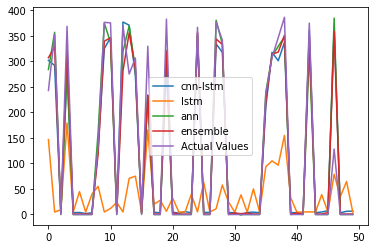

Metrics of equipment 1 : 


CNN_LSTM: 

Test MSE: 2245.611
RMSE : 47.388
MAE : 24.068


LSTM: 

Test MSE: 30556.839
RMSE : 174.805
MAE : 114.039


ANN: 

Test MSE: 2174.006
RMSE : 46.626
MAE : 18.637


ENSEMBLE : 

Test MSE: 1891.822
RMSE : 43.495
MAE : 20.053
Graph of equipment 2 : 



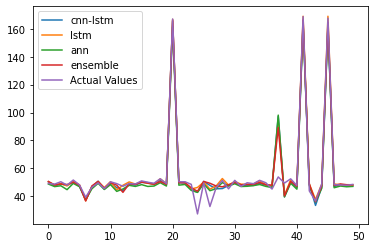

Metrics of equipment 2 : 


CNN_LSTM: 

Test MSE: 53.785
RMSE : 7.334
MAE : 3.286


LSTM: 

Test MSE: 44.894
RMSE : 6.700
MAE : 2.522


ANN: 

Test MSE: 54.894
RMSE : 7.409
MAE : 3.675


ENSEMBLE : 

Test MSE: 40.491
RMSE : 6.363
MAE : 2.811
Graph of equipment 3 : 



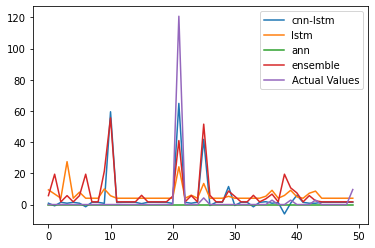

Metrics of equipment 3 : 


CNN_LSTM: 

Test MSE: 168.566
RMSE : 12.983
MAE : 4.819


LSTM: 

Test MSE: 227.357
RMSE : 15.078
MAE : 7.231


ANN: 

Test MSE: 294.454
RMSE : 17.160
MAE : 2.869


ENSEMBLE : 

Test MSE: 279.429
RMSE : 16.716
MAE : 8.090
Graph of equipment 4 : 



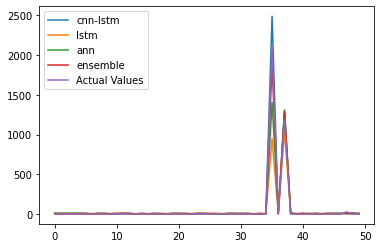

Metrics of equipment 4 : 


CNN_LSTM: 

Test MSE: 3167.143
RMSE : 56.277
MAE : 11.674


LSTM: 

Test MSE: 27481.729
RMSE : 165.776
MAE : 29.689


ANN: 

Test MSE: 10340.428
RMSE : 101.688
MAE : 22.003


ENSEMBLE : 

Test MSE: 1264.177
RMSE : 35.555
MAE : 10.722
Graph of equipment 5 : 



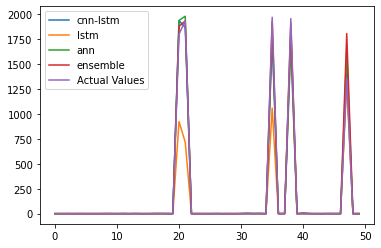

Metrics of equipment 5 : 


CNN_LSTM: 

Test MSE: 2665.215
RMSE : 51.626
MAE : 15.996


LSTM: 

Test MSE: 61824.897
RMSE : 248.646
MAE : 63.937


ANN: 

Test MSE: 2910.403
RMSE : 53.948
MAE : 15.377


ENSEMBLE : 

Test MSE: 4235.851
RMSE : 65.083
MAE : 12.719
Graph of equipment 6 : 



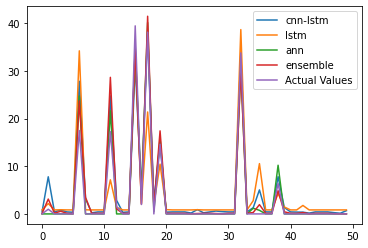

Metrics of equipment 6 : 


CNN_LSTM: 

Test MSE: 6.771
RMSE : 2.602
MAE : 1.336


LSTM: 

Test MSE: 17.800
RMSE : 4.219
MAE : 2.192


ANN: 

Test MSE: 2.627
RMSE : 1.621
MAE : 0.668


ENSEMBLE : 

Test MSE: 5.004
RMSE : 2.237
MAE : 0.963
Graph of equipment 7 : 



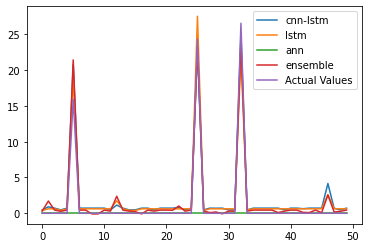

Metrics of equipment 7 : 


CNN_LSTM: 

Test MSE: 1.318
RMSE : 1.148
MAE : 0.844


LSTM: 

Test MSE: 1.314
RMSE : 1.146
MAE : 0.835


ANN: 

Test MSE: 30.965
RMSE : 5.565
MAE : 1.336


ENSEMBLE : 

Test MSE: 1.200
RMSE : 1.096
MAE : 0.606
Graph of equipment 8 : 



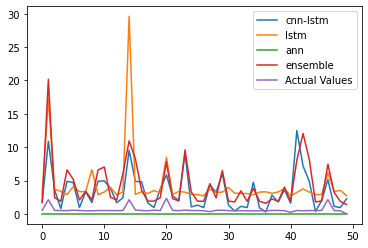

Metrics of equipment 8 : 


CNN_LSTM: 

Test MSE: 14.068
RMSE : 3.751
MAE : 2.764


LSTM: 

Test MSE: 28.397
RMSE : 5.329
MAE : 3.646


ANN: 

Test MSE: 0.606
RMSE : 0.778
MAE : 0.622


ENSEMBLE : 

Test MSE: 24.026
RMSE : 4.902
MAE : 3.645
Graph of equipment 9 : 



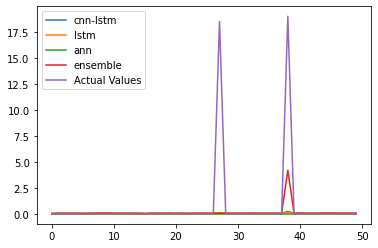

Metrics of equipment 9 : 


CNN_LSTM: 

Test MSE: 13.912
RMSE : 3.730
MAE : 0.801


LSTM: 

Test MSE: 13.933
RMSE : 3.733
MAE : 0.802


ANN: 

Test MSE: 14.128
RMSE : 3.759
MAE : 0.752


ENSEMBLE : 

Test MSE: 11.234
RMSE : 3.352
MAE : 0.720


In [64]:
all_model_graphs()